In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import plotly.express as px

%matplotlib inline


In [3]:
data = load_iris()
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris['class'] = data.target
iris['class'] = pd.Categorical.from_codes(data.target, data.target_names)
iris['class'] = iris['class'].astype('category')
iris


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
iris.dtypes

sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
class                category
dtype: object

In [5]:
X = iris.iloc[:,:-1]
Y = iris.iloc[:, -1]

<h3>Assumptions of LDA

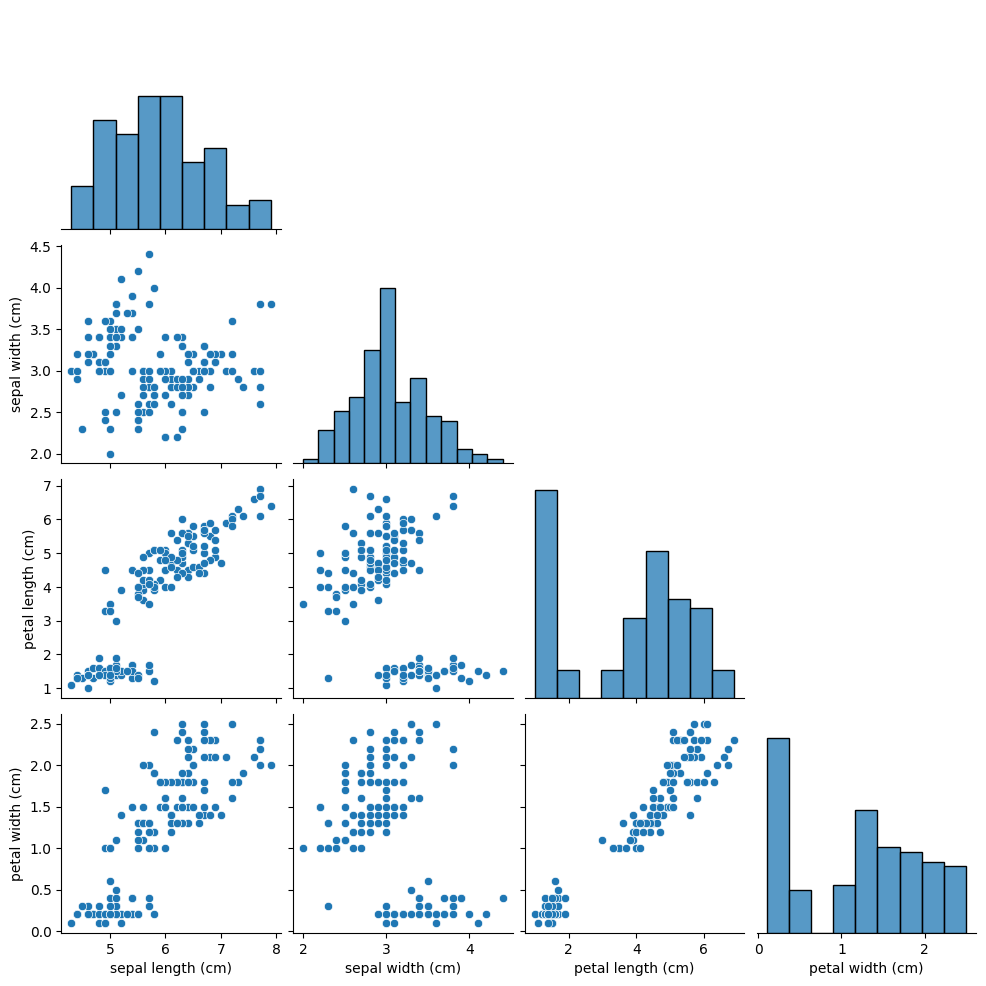

In [6]:
#normal distrubution of predictors
sns.pairplot(X, corner=True)

In [7]:
for i in X[data.feature_names]:
    print(f'skew of {i} - {X[i].skew()}')

skew of sepal length (cm) - 0.3149109566369728
skew of sepal width (cm) - 0.31896566471359966
skew of petal length (cm) - -0.27488417975101276
skew of petal width (cm) - -0.10296674764898116


<Axes: >

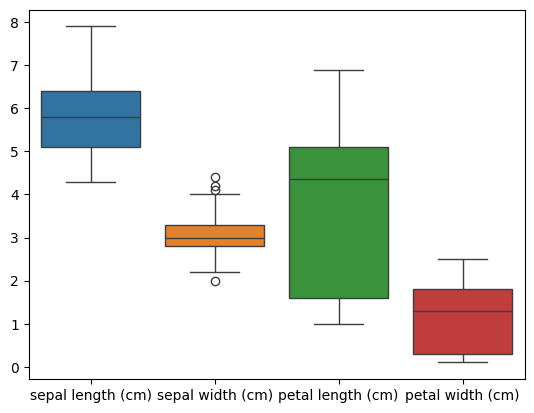

In [8]:
#same variance for predictors
sns.boxplot(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, shuffle=True)


## Linear Discriminant Analysis

In [10]:
model = LinearDiscriminantAnalysis()
lda = model.fit(X_train, y_train)
pred = lda.predict(X_test)
pred

array(['virginica', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'virginica'],
      dtype='<U10')

In [11]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
print("Mean Accuracy:", np.mean(scores))  # Average accuracy
print("Standard Deviation:", np.std(scores))  

Mean Accuracy: 0.9800000000000001
Standard Deviation: 0.03055050463303893


In [12]:
new = [5, 3, 1, .4]
lda.predict([new])

C:\Users\EdwinVivekN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array(['setosa'], dtype='<U10')

In [13]:
#LDA for dimensionality reduction
dim_red = lda.transform(X)


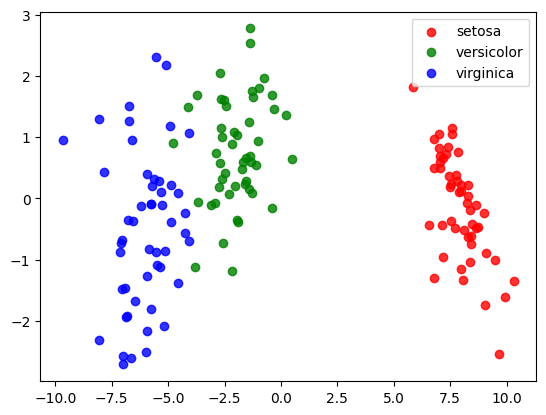

In [14]:
#create LDA plot
plt.figure()
colors = ['red', 'green', 'blue']

for color, i in zip(colors, data.target_names):
    plt.scatter(dim_red[Y == i, 0], dim_red[Y == i, 1], alpha=.8, color=color, label=i)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()

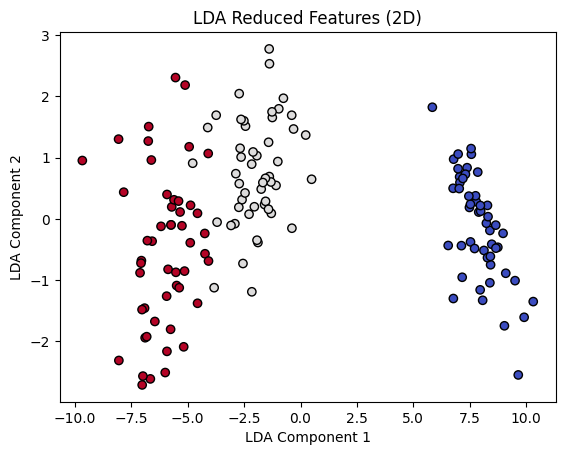

In [15]:
Y_encode = Y.apply(lambda x: 0 if x=="setosa" else 1 if x=="versicolor"  else 2 )
plt.scatter(dim_red[:, 0], dim_red[:, 1], c=Y_encode, cmap='coolwarm', edgecolors='k')
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("LDA Reduced Features (2D)")
plt.show()

In [16]:
#LDA for feature selection
feature_importance = abs(lda.coef_).sum(axis=0)
important_features = np.argsort(feature_importance)[::-1]
print("Feature importance ranking:", important_features)

Feature importance ranking: [3 2 1 0]


## PCA

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=None)  # Preserve 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [18]:
#Covariance matrix for each feature pair
covariance_matrix = pca.get_covariance()
print("Covariance matrix:\n", covariance_matrix)

#Eigenvalues (variance explained by each component)
eigenvalues = pca.explained_variance_
print("\nEigenvalues:\n", eigenvalues)

#PCA loadings
pca_loadings = pca.components_
print("\nPCA loadings:\n", pca_loadings)

# Eigenvectors (Principal components)
eigenvectors = pca_loadings / np.sqrt(eigenvalues[:, np.newaxis])
print("\nEigenvectors:\n", eigenvectors)

Covariance matrix:
 [[ 1.00840336 -0.17112344  0.87368107  0.82829623]
 [-0.17112344  1.00840336 -0.49129877 -0.42151136]
 [ 0.87368107 -0.49129877  1.00840336  0.97119859]
 [ 0.82829623 -0.42151136  0.97119859  1.00840336]]

Eigenvalues:
 [2.99421847 0.87342668 0.14388247 0.02208582]

PCA loadings:
 [[ 0.51274515 -0.30524695  0.57490055  0.55982681]
 [ 0.40945261  0.90765376  0.0327376   0.0862639 ]
 [ 0.71458238 -0.25664433 -0.15911616 -0.6310212 ]
 [-0.24251389  0.13085348  0.80193494 -0.53006106]]

Eigenvectors:
 [[ 0.29631922 -0.17640447  0.33223928  0.32352806]
 [ 0.43811731  0.97119622  0.03502947  0.09230301]
 [ 1.88385884 -0.67659335 -0.4194791  -1.66356588]
 [-1.6318486   0.88049832  5.39612972 -3.56672101]]


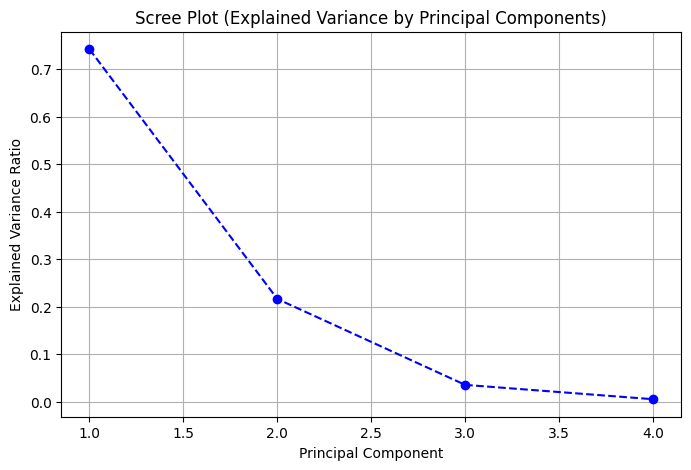

In [19]:
# Plot the explained variance (Scree Plot)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot (Explained Variance by Principal Components)')
plt.grid(True)
plt.show()

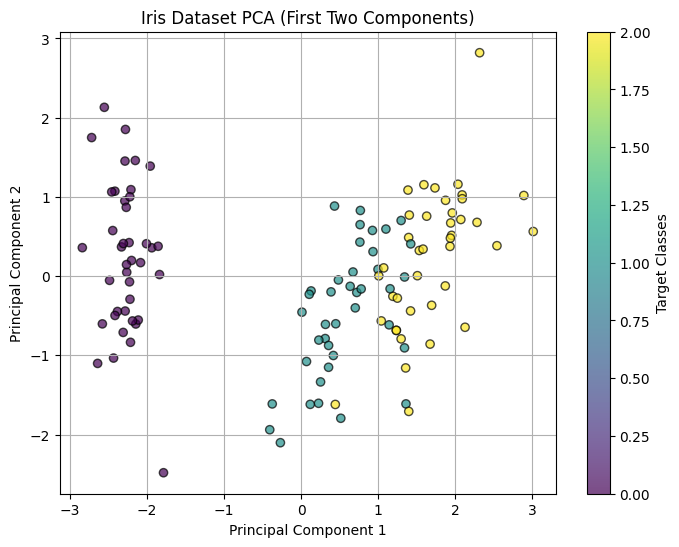

In [20]:
class_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
y_train_numeric = np.array([class_mapping[label] for label in y_train])

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))

# Color by target class
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_numeric, cmap='viridis', edgecolor='k', alpha=0.7)

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Iris Dataset PCA (First Two Components)')
plt.colorbar(scatter, label='Target Classes')
plt.grid(True)

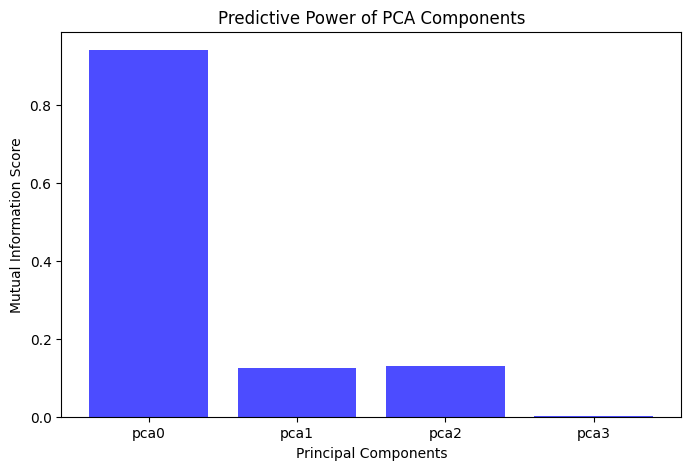

In [21]:
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(X_train_pca, y_train, discrete_features=False)
pc_names = pca.get_feature_names_out().tolist()
mi_df = pd.DataFrame({'Principal Component': pca.get_feature_names_out().tolist(), 'MI Score': mi_scores})
plt.figure(figsize=(8, 5))
plt.bar(mi_df['Principal Component'], mi_df['MI Score'], color='blue', alpha=0.7)
plt.xlabel("Principal Components")
plt.ylabel("Mutual Information Score")
plt.title("Predictive Power of PCA Components")
plt.show()

In [55]:
# Check PCA loadings (contribution of original features to PCs)
loadings = pd.DataFrame(pca.components_, columns=X_train.columns, index=pc_names)
print("\nPCA Loadings (Feature Contributions to PCs):")
loadings


PCA Loadings (Feature Contributions to PCs):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
pca0,0.512745,-0.305247,0.574901,0.559827
pca1,0.409453,0.907654,0.032738,0.086264
pca2,0.714582,-0.256644,-0.159116,-0.631021
pca3,-0.242514,0.130853,0.801935,-0.530061


In [57]:
loadings = pd.DataFrame(pca.components_.T, columns=pc_names, index=X_train.columns)
print("\nPCA Loadings (Feature Contributions to PCs):")
loadings


PCA Loadings (Feature Contributions to PCs):


,pca0,pca1,pca2,pca3
sepal length (cm),0.512745,0.409453,0.714582,-0.242514
sepal width (cm),-0.305247,0.907654,-0.256644,0.130853
petal length (cm),0.574901,0.032738,-0.159116,0.801935
petal width (cm),0.559827,0.086264,-0.631021,-0.530061


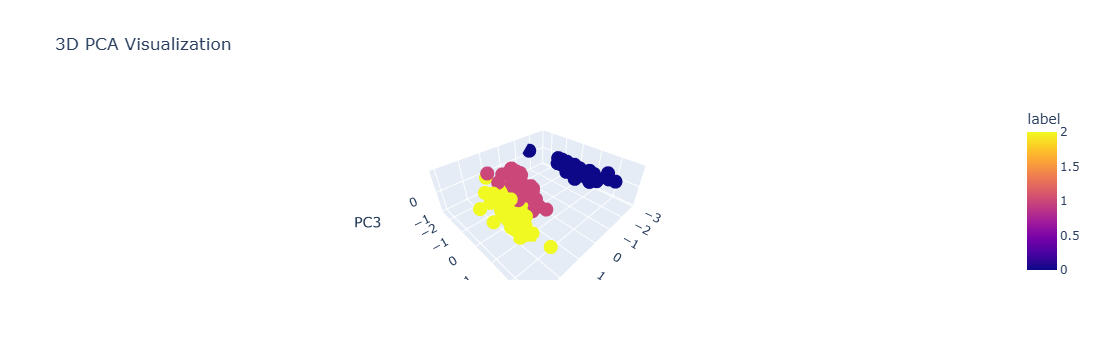

In [54]:
df_pca = pd.DataFrame(X_train_pca[:,:-1], columns=['PC1', 'PC2', 'PC3'])
df_pca['label'] = y_train_numeric  # if you have labels (e.g., for coloring)

fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3',
                    color='label',  # or remove if unlabeled
                    title='3D PCA Visualization')
fig.show()

## Kernel PCA

In [40]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 3, kernel = 'rbf')
kpca_train = kpca.fit_transform(X_train_scaled)
kpca_test = kpca.transform(X_test_scaled)

In [41]:
kpca.eigenvalues_

array([32.11843709, 14.0681107 ,  7.02509703])

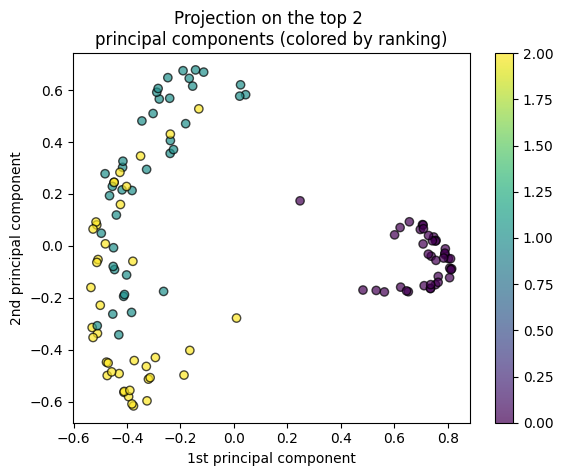

In [53]:
fig, ax = plt.subplots()

sc=ax.scatter(kpca_train[:,0],kpca_train[:,1] ,c=y_train_numeric, cmap='viridis', edgecolor='k', alpha=0.7)
fig.colorbar(sc, orientation='vertical')
#ax.annotate(industrys[ranking], (kpca_train[ranking,0],kernel_score[ranking,1]))
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.title("Projection on the top 2 \nprincipal components (colored by ranking)")
plt.show()

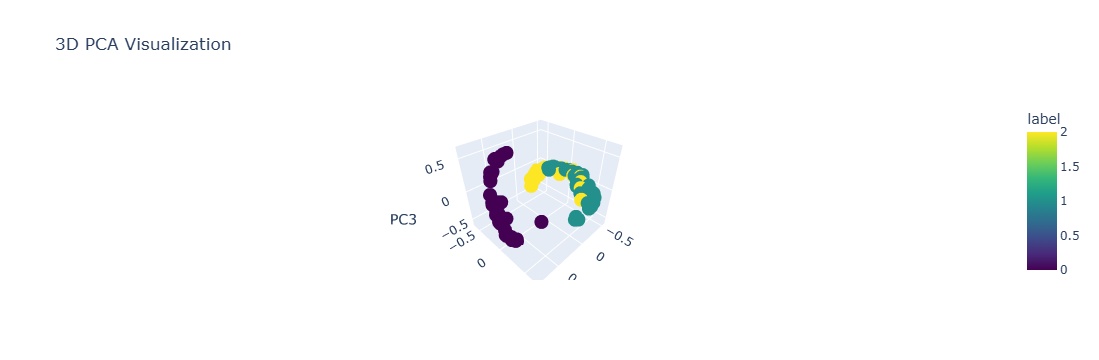

In [49]:
df_kpca = pd.DataFrame(kpca_train, columns=['PC1', 'PC2', 'PC3'])
df_kpca['label'] = y_train_numeric  # if you have labels (e.g., for coloring)
fig = px.scatter_3d(df_kpca, x='PC1', y='PC2', z='PC3',
                    color='label',  
                    color_continuous_scale='viridis',
                    title='3D PCA Visualization')
fig.show()

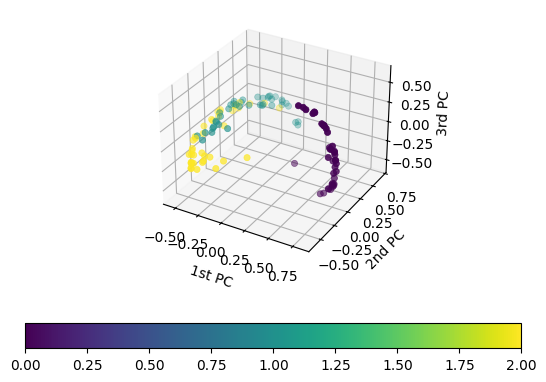

In [51]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
sc=ax.scatter(kpca_train[:,0], kpca_train[:,1],  kpca_train[:,2], c=y_train_numeric, cmap='viridis', linewidth=0.5);
fig.colorbar(sc, orientation='horizontal')
ax.set_xlabel('1st PC')
ax.set_ylabel('2nd PC')
ax.set_zlabel('3rd PC')
plt.show()

In [163]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\EdwinVivekN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [164]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 8  0  0]
 [ 0 13  0]
 [ 0  0  9]]


1.0

In [165]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

## t-SNE

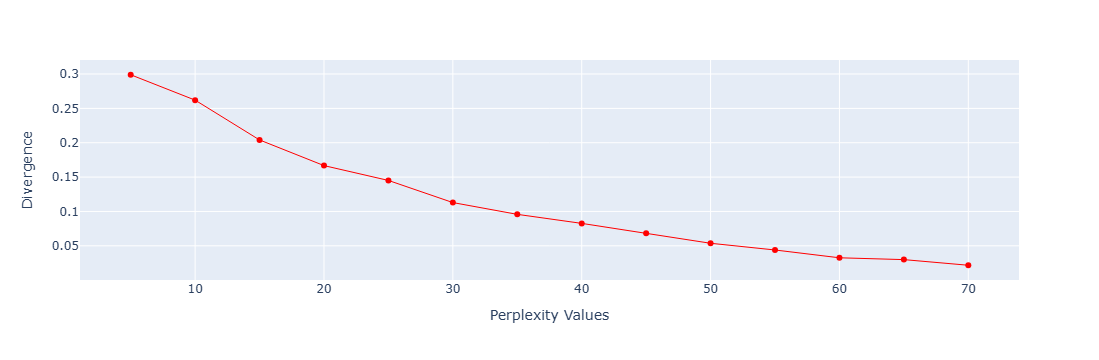

In [176]:
from sklearn.manifold import TSNE
import plotly.express as px
perplexity = np.arange(5, 75, 5)
divergence = []

for i in perplexity:
    model = TSNE(n_components=2, init="pca", perplexity=i)
    reduced = model.fit_transform(X_train_scaled)
    divergence.append(model.kl_divergence_)
fig = px.line(x=perplexity, y=divergence, markers=True)
fig.update_layout(xaxis_title="Perplexity Values", yaxis_title="Divergence")
fig.update_traces(line_color="red", line_width=1)
fig.show()

KL-Divergence: 0.053696174174547195


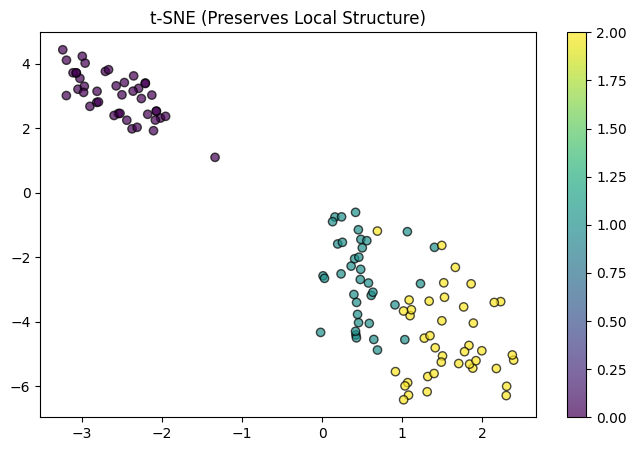

In [179]:
# Apply t-SNE (reduces to 2D while preserving local structure)
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
X_tsne = tsne.fit_transform(X_train_scaled)
print(f'KL-Divergence: {tsne.kl_divergence_}')

# Plot t-SNE results
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
sc = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train_numeric, cmap='viridis', edgecolor='k', alpha=0.7)
fig.colorbar(sc, orientation='vertical')
ax.set_title("t-SNE (Preserves Local Structure)")
plt.show()

In [186]:
# Filter points in the top-left quadrant
setosa_indices = np.where((X_tsne[:, 0] < -1) & (X_tsne[:, 1] > 1.5))[0]  # Adjust the threshold if needed

print(f"Indices of Setosa in t-SNE: {np.shape(setosa_indices)}")

Indices of Setosa in t-SNE: (41,)


In [207]:
#Relating the cluster indexes back to actual data
pd.concat([X_train.iloc[setosa_indices, :], y_train.iloc[setosa_indices]], axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
13,4.3,3.0,1.1,0.1,setosa
14,5.8,4.0,1.2,0.2,setosa
31,5.4,3.4,1.5,0.4,setosa
37,4.9,3.6,1.4,0.1,setosa
24,4.8,3.4,1.9,0.2,setosa
11,4.8,3.4,1.6,0.2,setosa
21,5.1,3.7,1.5,0.4,setosa
9,4.9,3.1,1.5,0.1,setosa
23,5.1,3.3,1.7,0.5,setosa
48,5.3,3.7,1.5,0.2,setosa


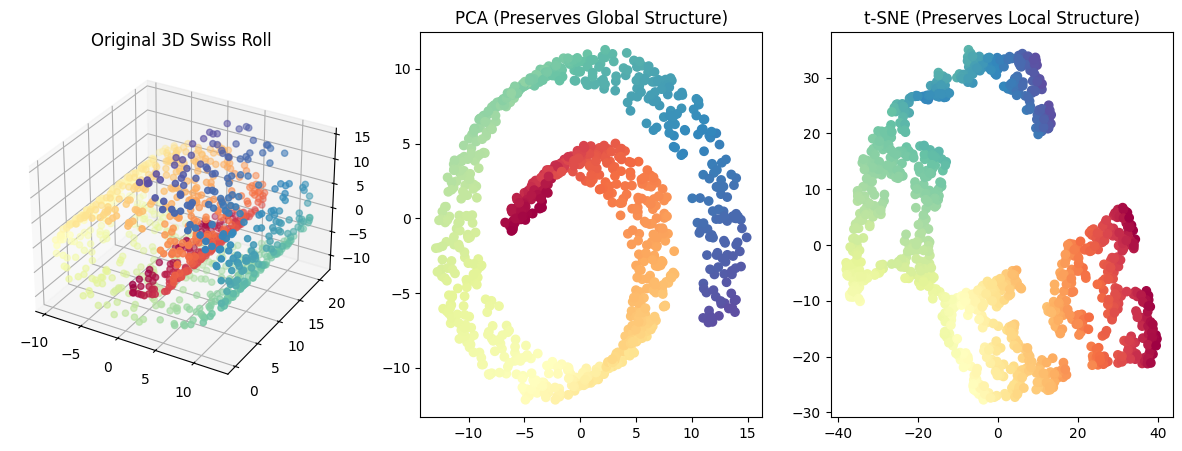

In [155]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Generate Swiss Roll dataset
n_samples = 1000
X, color = make_swiss_roll(n_samples, noise=0.1)

# Apply PCA (reduces to 2D while preserving global structure)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply t-SNE (reduces to 2D while preserving local structure)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot original 3D Swiss Roll
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original 3D Swiss Roll")

# Plot PCA results
ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap=plt.cm.Spectral)
ax2.set_title("PCA (Preserves Global Structure)")

# Plot t-SNE results
ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, cmap=plt.cm.Spectral)
ax3.set_title("t-SNE (Preserves Local Structure)")

plt.show()

## KNN

In [27]:
# Standardize features
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# Train model
knn_clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn_clf.predict(X_test)
y_pred_prob = knn_clf.predict_proba(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9333333333333333


In [24]:
#choose k
k_values = np.arange(1, np.sqrt(X_train.shape[0]), dtype=int)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    cv_scores.append(scores.mean())

best_k = k_values[np.argmax(cv_scores)]
print(f"Best K: {best_k}, Accuracy: {max(cv_scores):.4f}")

Best K: 8, Accuracy: 0.9667


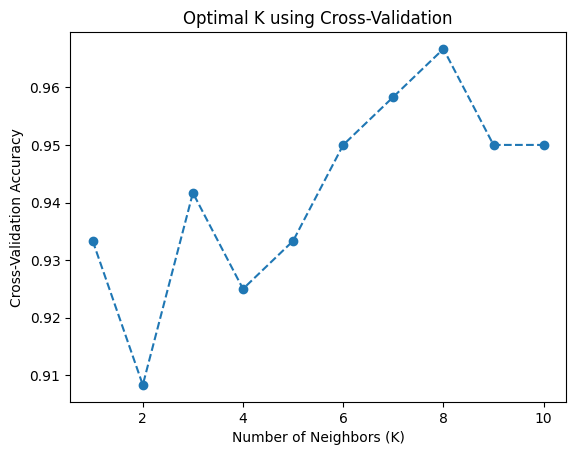

In [25]:
# Plot K vs. Cross-validation Accuracy
plt.plot(k_values, cv_scores, marker='o', linestyle='dashed')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Optimal K using Cross-Validation')
plt.show()

In [26]:
#elbow method
error_rates = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rates.append(1 - accuracy_score(y_test, y_pred))
    
                       
# Find the optimal K (Elbow Point)
best_k = k_values[np.argmin(error_rates)]
print(f"Best K (Elbow Point): {best_k}")                     
    

Best K (Elbow Point): 1


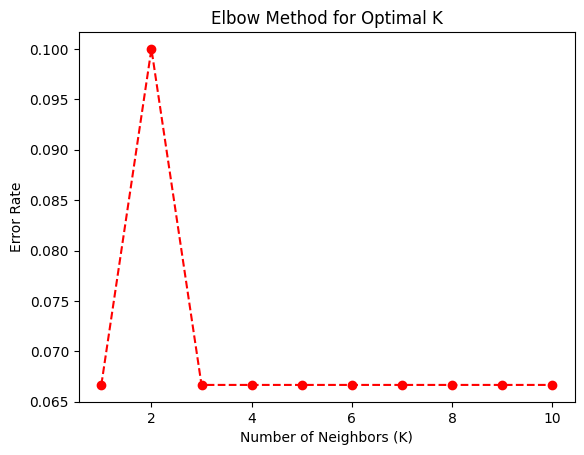

In [21]:
# Plot K vs. Error Rate
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='red')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Optimal K')
plt.show()

In [31]:
# Compute multi-class ROC AUC score
auc_ovr = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')  # One-vs-Rest
print(f'auc_ovr: {auc_ovr}')
auc_ovo = roc_auc_score(y_test, y_pred_prob, multi_class='ovo')  # One-vs-One
print(f'auc_ovo: {auc_ovo}')


auc_ovr: 0.9961659381949236
auc_ovo: 0.9947089947089948


In [90]:
best_thresholds_roc = {}

for i, category in enumerate(y_test.unique().tolist()):  # 3 classes in Iris dataset
    fpr, tpr, thresholds = roc_curve([1 if label == category else 0 for label in y_test], y_pred_prob[:, i])
    j_scores = tpr - fpr  # Compute Youden's J score
    best_thresholds_roc[category] = thresholds[np.argmax(j_scores)]  # Best threshold

print("Best Thresholds (ROC-Based):", best_thresholds_roc)

Best Thresholds (ROC-Based): {'setosa': 0.6, 'versicolor': 0.8, 'virginica': 0.2}


In [93]:
def adjust_predictions(y_pred_prob, best_thresholds, class_names):
    adjusted_preds = []
    for probs in y_pred_prob:
        class_pred = np.argmax([1 if probs[i] >= best_thresholds[category] else 0 for i, category in enumerate(class_names)])
        #cat_pred = class_pred.apply(lambda x: "setosa" if x==0 else "ver")
        adjusted_preds.append(class_names[class_pred])
    return np.array(adjusted_preds)

# Adjust predictions using the new thresholds
y_adjusted_roc = adjust_predictions(y_pred_prob, best_thresholds_roc, y_test.unique().tolist())

print("Adjusted Predictions (ROC-Based Thresholds):", y_adjusted_roc)

Adjusted Predictions (ROC-Based Thresholds): ['setosa' 'versicolor' 'setosa' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'virginica' 'setosa' 'setosa' 'virginica' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'setosa' 'setosa' 'virginica']


In [95]:
from sklearn.metrics import classification_report

print("Original Predictions:\n", classification_report(y_test, y_pred))
print("\nROC-Adjusted Predictions:\n", classification_report(y_test, y_adjusted_roc))

Original Predictions:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.82      1.00      0.90         9
   virginica       1.00      0.71      0.83         7

    accuracy                           0.93        30
   macro avg       0.94      0.90      0.91        30
weighted avg       0.95      0.93      0.93        30


ROC-Adjusted Predictions:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



## Decision Tree

In [35]:
def compare_models(m1, m2):
    f = plt.figure(figsize=(20,18))
    ax = f.add_subplot(221)
    tree.plot_tree(m1.fit(X, Y), class_names=data.target_names, feature_names=data.feature_names, filled=True, node_ids=True, rounded=True, ax= ax, fontsize=15)
    ax2 = f.add_subplot(222)
    tree.plot_tree(m2.fit(X, Y),class_names=data.target_names, feature_names=data.feature_names, filled=True, node_ids=True, rounded=True, ax= ax2, fontsize=15)

In [ ]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3, splitter='best')
model.fit(X, Y)
y_pred = model.predict(X)
print ("Accuracy Score : ", accuracy_score(Y,y_pred)*100) 

In [ ]:
model2 = DecisionTreeClassifier(criterion='gini', max_depth=5, splitter='best', min_samples_split=50, 
                                min_samples_leaf= 20, min_impurity_split=0.1)
model2.fit(X, Y)
y_pred2 = model2.predict(X)
print ("Accuracy Score 2 : ", accuracy_score(Y,y_pred2)*100) 

In [ ]:
compare_models(model, model2)

In [ ]:
#post pruning using Cross validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores, cv_scores_list

def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

In [ ]:
# fitting trees of depth 1 to 5
sm_tree_depths = range(1,6)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, sm_cv_scores_list = run_cross_validation_on_trees(X, Y, 
                                                                                        sm_tree_depths)

print(sm_accuracy_scores)
print(sm_cv_scores_mean)
print(sm_cv_scores_list)

In [ ]:
# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [ ]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))


In [ ]:
#Grid search CV
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':range(1,6)}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) #cross validation
gridcv = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=5, cv=cv)
gridcv.fit(X, Y)
modelcv = gridcv.best_estimator_
print (gridcv.best_score_, gridcv.best_params_) 